In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Loading Data
df = pd.read_csv(r"C:\Users\Admin\Downloads\diminos_data.csv")
df.head()

order_id      order_placed_at          order_delivered_at
0   1523111  2023-03-01 00:00:59  2023-03-01 00:18:07.443132
1   1523112  2023-03-01 00:03:59  2023-03-01 00:19:34.925241
2   1523113  2023-03-01 00:07:22  2023-03-01 00:22:28.291385
3   1523114  2023-03-01 00:07:47  2023-03-01 00:46:19.019399
4   1523115  2023-03-01 00:09:03  2023-03-01 00:25:13.619056

In [7]:
df.describe(include ="all")

order_id      order_placed_at          order_delivered_at
count   1.500000e+04                15000                       15000
unique           NaN                14953                       15000
top              NaN  2023-03-27 10:46:29  2023-03-01 00:18:07.443132
freq             NaN                    2                           1
mean    1.530610e+06                  NaN                         NaN
std     4.330271e+03                  NaN                         NaN
min     1.523111e+06                  NaN                         NaN
25%     1.526861e+06                  NaN                         NaN
50%     1.530610e+06                  NaN                         NaN
75%     1.534360e+06                  NaN                         NaN
max     1.538110e+06                  NaN                         NaN

In [5]:
df.shape

(15000, 3)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            15000 non-null  int64 
 1   order_placed_at     15000 non-null  object
 2   order_delivered_at  15000 non-null  object
dtypes: int64(1), object(2)
memory usage: 351.7+ KB


In [8]:
df['order_placed_at'] = pd.to_datetime(df['order_placed_at'])

df['order_delivered_at'] = pd.to_datetime(df['order_delivered_at'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            15000 non-null  int64         
 1   order_placed_at     15000 non-null  datetime64[ns]
 2   order_delivered_at  15000 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1)
memory usage: 351.7 KB


In [9]:
df['delivery_time_mints'] = (df['order_delivered_at'] - df['order_placed_at']).dt.total_seconds()/60

df[['delivery_time_mints']].head()

delivery_time_mints
0            17.140719
1            15.598754
2            15.104856
3            38.533657
4            16.176984

In [10]:
df.isnull().sum()

order_id               0
order_placed_at        0
order_delivered_at     0
delivery_time_mints    0
dtype: int64

In [11]:
df[df['delivery_time_mints'] <=0]

Empty DataFrame
Columns: [order_id, order_placed_at, order_delivered_at, delivery_time_mints]
Index: []

In [12]:
df['delivery_time_mints'].describe()

count    15000.000000
mean        20.499389
std         96.160362
min         15.000010
25%         15.274826
50%         15.797986
75%         17.279661
max       7299.831375
Name: delivery_time_mints, dtype: float64

In [13]:

p95 = df['delivery_time_mints'].quantile(0.95)
p95

27.261043996666658

In [14]:
if p95 < 31:
    print('SLA MET')
else:
    print('SLA Breach')

SLA MET


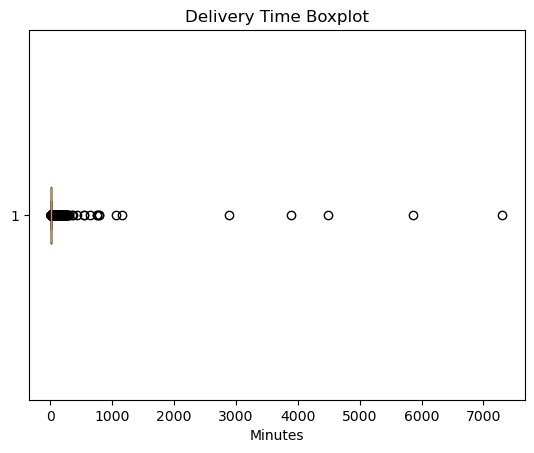

In [15]:
plt.figure()
plt.boxplot(df['delivery_time_mints'], vert=False)
plt.title("Delivery Time Boxplot")
plt.xlabel("Minutes")
plt.show()

In [17]:

df_clean = df[df['delivery_time_mints'] <= 120]
df_clean.head()

order_id     order_placed_at         order_delivered_at  \
0   1523111 2023-03-01 00:00:59 2023-03-01 00:18:07.443132   
1   1523112 2023-03-01 00:03:59 2023-03-01 00:19:34.925241   
2   1523113 2023-03-01 00:07:22 2023-03-01 00:22:28.291385   
3   1523114 2023-03-01 00:07:47 2023-03-01 00:46:19.019399   
4   1523115 2023-03-01 00:09:03 2023-03-01 00:25:13.619056   

   delivery_time_mints  
0            17.140719  
1            15.598754  
2            15.104856  
3            38.533657  
4            16.176984

In [18]:

p95_clean = df_clean['delivery_time_mints'].quantile(0.95)
p95_clean

26.247372241666667

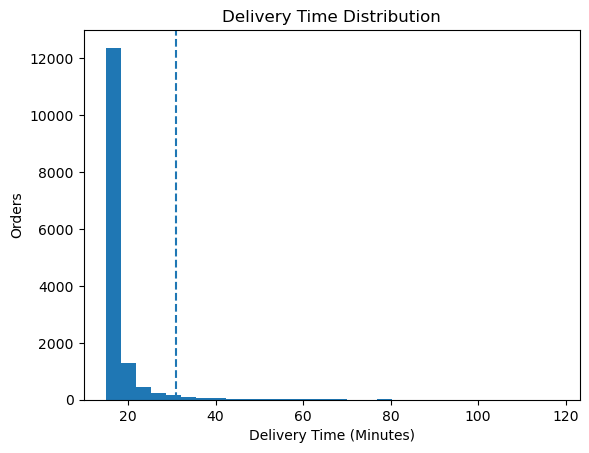

In [19]:
plt.figure()
plt.hist(df_clean['delivery_time_mints'], bins=30)
plt.axvline(31, linestyle='--')
plt.xlabel("Delivery Time (Minutes)")
plt.ylabel("Orders")
plt.title("Delivery Time Distribution")
plt.show()

In [20]:
df_clean['sla_breach'] = df_clean['delivery_time_mints'] > 31

breach_rate = df_clean['sla_breach'].mean() * 100
breach_rate

C:\Users\Admin\AppData\Local\Temp\ipykernel_3388\2301455092.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['sla_breach'] = df_clean['delivery_time_mints'] > 31


3.2683678253298507

In [21]:
late_orders = df_clean[df_clean['sla_breach']]
late_orders.head()

order_id     order_placed_at         order_delivered_at  \
3     1523114 2023-03-01 00:07:47 2023-03-01 00:46:19.019399   
47    1523158 2023-03-01 01:57:16 2023-03-01 02:30:19.851911   
174   1523285 2023-03-01 07:22:11 2023-03-01 08:12:51.906470   
261   1523372 2023-03-01 11:20:21 2023-03-01 12:01:21.359545   
272   1523383 2023-03-01 11:48:29 2023-03-01 12:30:57.713993   

     delivery_time_mints  sla_breach  
3              38.533657        True  
47             33.064199        True  
174            50.681774        True  
261            41.005992        True  
272            42.478567        True

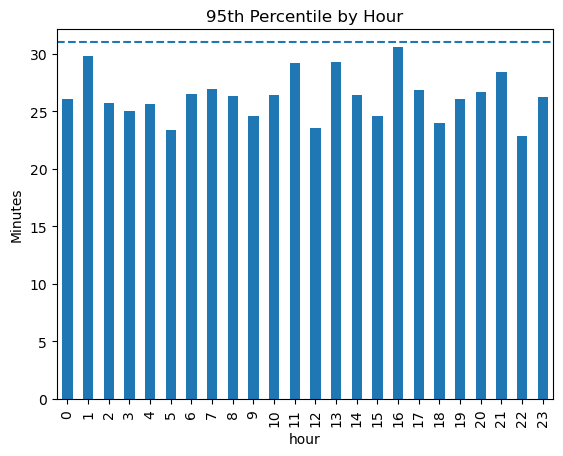

In [23]:
hourly_p95 = df_clean.groupby('hour')['delivery_time_mints'].quantile(0.95)

plt.figure()
hourly_p95.plot(kind='bar')
plt.axhline(31, linestyle='--')
plt.title("95th Percentile by Hour")
plt.ylabel("Minutes")
plt.show()


In [24]:

day_p95 = df_clean.groupby('day')['delivery_time_mints'].quantile(0.95)
day_p95

day
Friday       25.498189
Monday       27.480235
Saturday     26.384227
Sunday       24.879806
Thursday     26.119070
Tuesday      28.292172
Wednesday    25.539056
Name: delivery_time_mints, dtype: float64

In [25]:

summary = {
    "Total Orders": len(df_clean),
    "Avg Delivery Time": df_clean['delivery_time_mints'].mean(),
    "95th Percentile": p95_clean,
    "SLA Breach %": breach_rate
}

pd.DataFrame(summary, index=["Value"])

Total Orders  Avg Delivery Time  95th Percentile  SLA Breach %
Value         14931          17.760636        26.247372      3.268368

In [26]:
print(f"""
SLA Evaluation Summary
---------------------
Average Delivery Time : {df_clean['delivery_time_mints'].mean():.2f} mins
95th Percentile       : {p95_clean:.2f} mins
SLA Limit             : 31 mins
SLA Breach Rate       : {breach_rate:.2f} %
""")



SLA Evaluation Summary
---------------------
Average Delivery Time : 17.76 mins
95th Percentile       : 26.25 mins
SLA Limit             : 31 mins
SLA Breach Rate       : 3.27 %



In [ ]:
# This project evaluates the pizza delivery performance of Kanav’s Diminos store using delivery time data.
# The average delivery time is 17.76 minutes, which is well within the promised delivery limit.
# The 95th percentile delivery time is 26.25 minutes, meeting the SLA requirement of 31 minutes.
# Only 3.27% of orders exceed the delivery limit, indicating minimal SLA breaches.
# Overall, the store is performing efficiently and consistently.
# Based on the analysis, Kanav’s store meets Diminos’ SLA standards.
# The franchise is not at risk at present.
# Regular monitoring is recommended to maintain this performance in the future.